#### Employee Turnover Analytics..
Course-end Project 8

DESCRIPTION

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level. 

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.  

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period. 

- As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to 

- Perform data quality check by checking for missing values if any. 

- Understand what factors contributed most to employee turnover by EDA. 

- Perform clustering of Employees who left based on their satisfaction and evaluation. 

- Handle the left Class Imbalance using SMOTE technique. 

- Perform k-fold cross-validation model training and evaluate performance.  

- Identify the best model and justify the evaluation metrics used.  

- Suggest various retention strategies for targeted employees. 

In [1]:
# Import the neccessary modules for data manipulation and visualrepresentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('D:\HR_comma_sep.csv')

In [3]:
# Examine the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Rename Columns
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
 'last_evaluation': 'evaluation',
'number_project': 'projectCount',
'average_montly_hours': 'averageMonthlyHours',
'time_spend_company': 'yearsAtCompany',
'Work_accident': 'workAccident',
'promotion_last_5years': 'promotion',
'sales' : 'department',
'left' : 'turnover'
 })

In [5]:
df.shape

(14999, 10)

In [6]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
round(df.turnover.value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

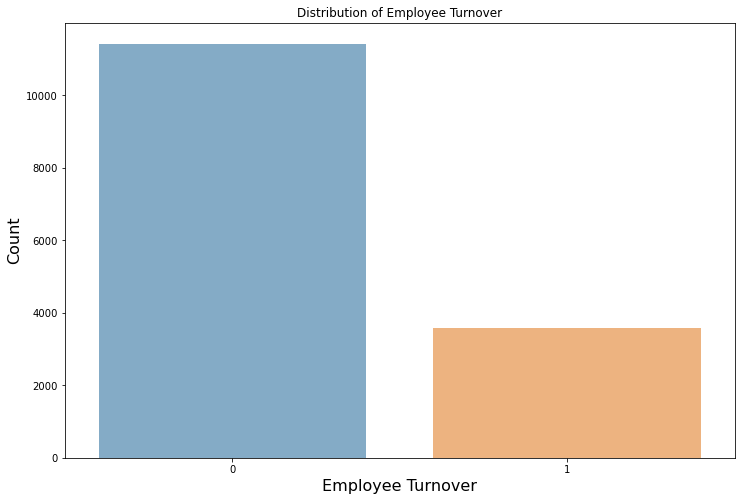

In [8]:
plt.figure(figsize=(12,8))
turnover = df.turnover.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16);

### 1. Perform data quality check by checking for missing values if any

In [9]:
# Can you check to see if there are any missing values in our data set
df.isnull().any()

satisfaction           False
evaluation             False
projectCount           False
averageMonthlyHours    False
yearsAtCompany         False
workAccident           False
turnover               False
promotion              False
department             False
salary                 False
dtype: bool

In [10]:
# Check the type of our features. Are there any data inconsistencies?
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

### 2. Understand what factors contributed most to employee turnover by EDA

In [11]:
# Display the statistical overview of the employees
round(df.describe(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [12]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover). 
What do you notice between the groups?
turnover_Summary = df.groupby('turnover')
round(turnover_Summary.mean(), 2)

Object `groups` not found.


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [13]:
round(turnover_Summary.std(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


### Correlation Matrix

In [14]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
corr = df.corr()
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


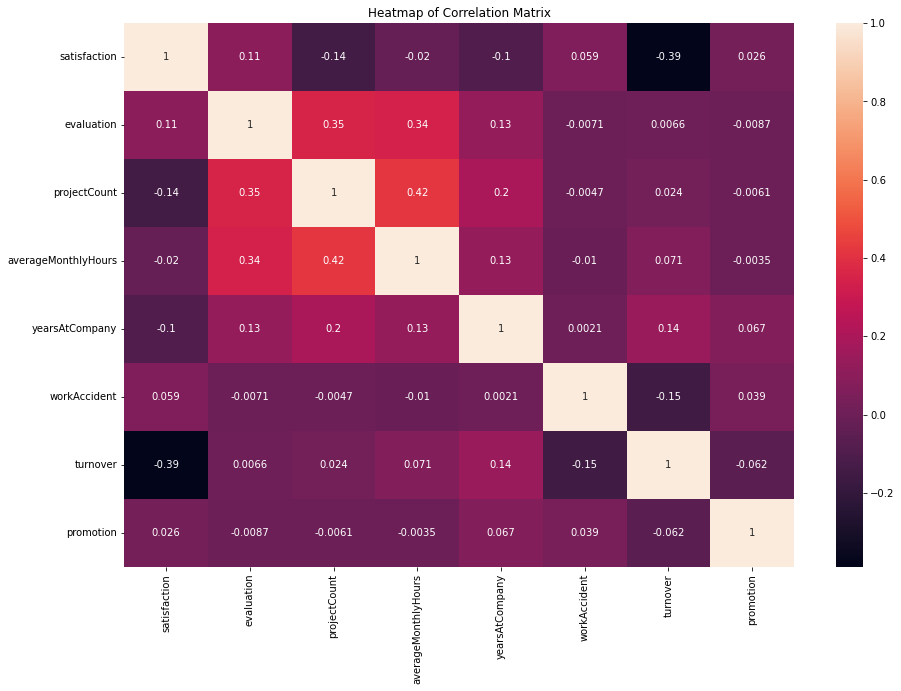

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
yticklabels=corr.columns.values, annot=True)
plt.title('Heatmap of Correlation Matrix');

### Distribution of Satisfaction, Evaluation, and Monthly Hours

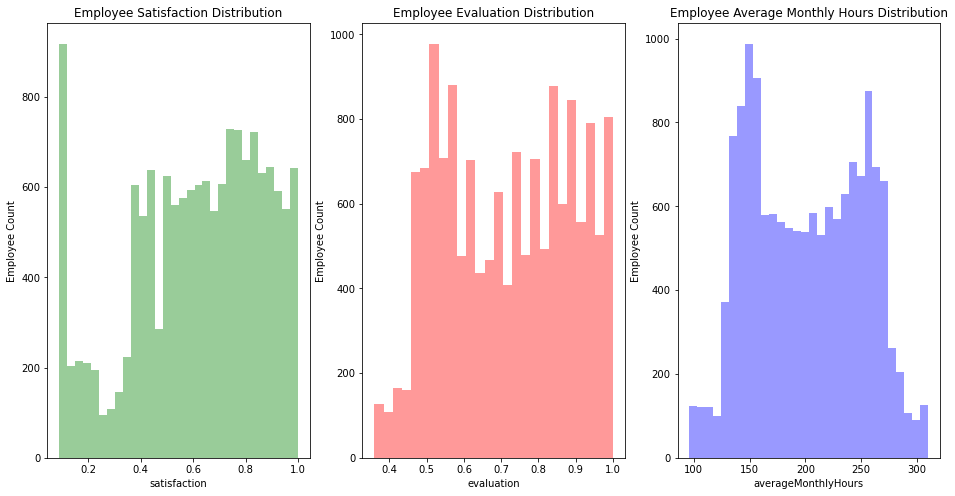

In [16]:
# Plot the distribution of Employee Satisfaction, Evaluation, and Project Count. What story can you tell?
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(16, 8))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", 
ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count');

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", 
ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count');

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", 
ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count');


### Bar plot of employee project count

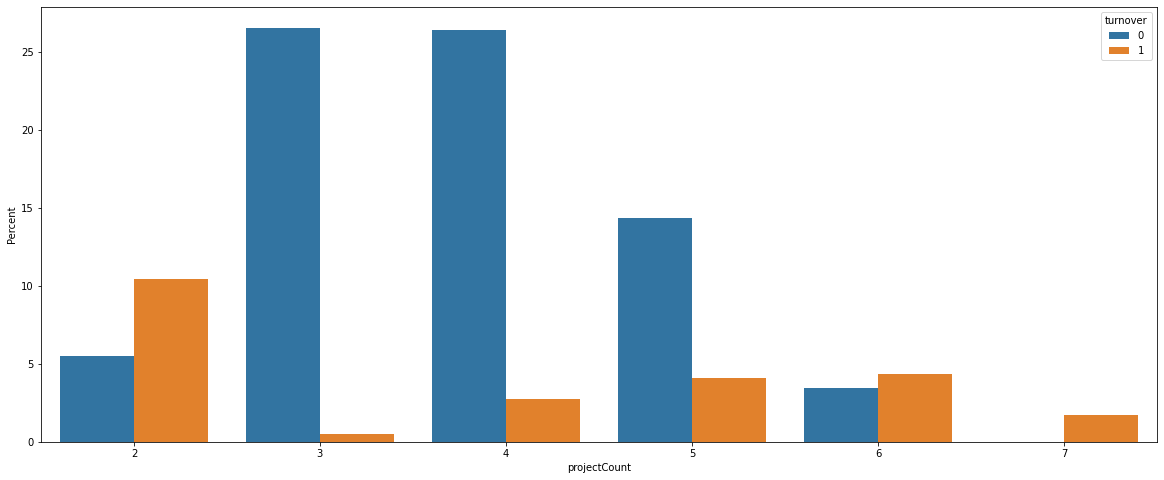

In [17]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", 
data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent");


#### • More than half of the employees with 2, 6 and 7 projects left the company

#### • Majority of the employees who did not leave the company had 3,4, and 5 projects

#### • All of the employees with 7 projects left the company

#### • There is an increase in employee turnover rate as project count increases

### 3. Perform clustering of Employees who left based on their satisfaction and evaluation

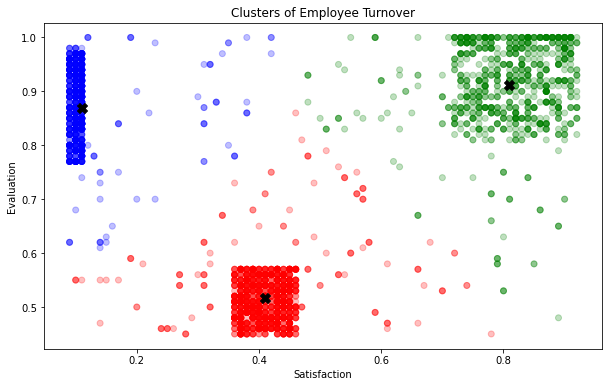

In [18]:
# Import KMeans Model
from sklearn.cluster import KMeans
# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red'
for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
 alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:
,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show();

#### Cluster 1 (Blue): Hard-working and Sad Employees

#### Cluster 2 (Red): Bad and Sad Employee

#### Cluster 3 (Green): Hard-working and Happy Employee

#### There are 3 distinct clusters for employees who left the company

### Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

### • Question: What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

### Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

### • Question: Could this cluster mean employees who "under-performed"?


### Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

### • Question: Could this cluser mean that employees left because they found another job opportunity?


#### Pre-processing

#### 4.Handle the left Class Imbalance using SMOTE technique.

#### 4a. Pre-Process the data by converting categorical columns to numerical

#### • Separate categorical variables and numeric variables.

#### • Apply get_dummies() to the categorical variables.

#### • Combine categorical variables and numeric variables.

In [19]:
cat_var = ['department','salary','turnover','promotion']

In [20]:
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']

In [21]:
categorical_df = pd.get_dummies(df[cat_var], drop_first=True, dummy_na=True)

In [22]:
numerical_df = df[num_var]

In [23]:
new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,turnover,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,department_nan,salary_low,salary_medium,salary_nan,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.37,0.52,2,159,3,0


In [24]:
new_df.shape

(14999, 21)

#### 4b. Split Train/Test Set

#### Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [26]:
# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

In [27]:
# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [28]:
print(X_train.shape)
print(X_test.shape)

(11999, 20)
(3000, 20)


#### 4c. Class Imbalance

#### Employee Turnover Rate: 24%

In [29]:
round(df.turnover.value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

#### 4c. Upsample the train dataset using SMOTE technique

In [30]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

In [32]:
# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original shape: (11999, 20) (11999,)
SMOTE sample shape: (18284, 20) (18284,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#### Perform 5-Fold cross validation model training and evaluate performance

#### We're training 3 models:

### 1. Logistic Regression Classifier



### 2. Random Forest Classifier 

### 3. Gradient Boosting Classifier

### Logistic Regression Classifier

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

LogisticRegression()

#### Apply 5-Fold Cross Validation on Logistic Regression

In [35]:
lr_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, 
scoring='f1')
lr_result.mean()

0.7943310422753499

#### Logistic Regression Classifier AUC (0.77)

In [36]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % lr_auc)
lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))




 ---Logistic Regression Model---
Logistic Regression AUC = 0.77
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.50      0.78      0.61       714

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.78      3000



#### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier()

#### Apply 5-Fold Cross Validation on Random Forest

In [39]:
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, 
scoring='f1')
rf_result.mean()

0.9806582697194856

### Random Forest Classifier AUC (0.98)


In [40]:
from sklearn.metrics import roc_auc_score
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



### Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier() 
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

#### Apply 5-Fold Cross Validation on Gradient Boosting Classifier

In [42]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, 
scoring='f1')
gbc_result.mean()

0.9584897492384407

#### Gradient Boosting Classifier AUC (0.96)

In [43]:
from sklearn.metrics import roc_auc_score
print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.91      0.94      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



### Model Evaluation (F1 Score & ROC/AUC)

### ROC Graph

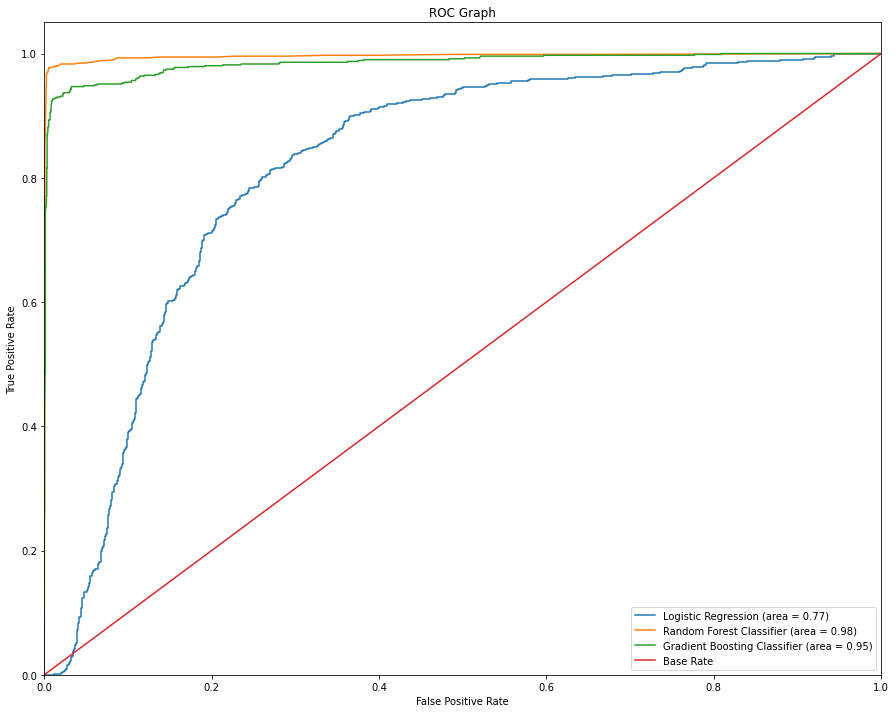

In [44]:
# Create ROC Graph
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1]) 
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, 
rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, 
gbc.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();



In [45]:
# Confusion Matrix for Logistic Regresion
confusion_matrix(y_test, lr.predict(X_test))


array([[1727,  559],
       [ 158,  556]], dtype=int64)

In [46]:
# Confusion Matrix for GBC
confusion_matrix(y_test, gbc.predict(X_test))

array([[2222,   64],
       [  45,  669]], dtype=int64)

In [47]:
# Confusion Matrix for Random Forest
confusion_matrix(y_test, rf.predict(X_test))


array([[2267,   19],
       [  16,  698]], dtype=int64)

### Recall or Precision?

### It depends on how much cost/weight you want on your two types of errors: (1) False Positives or (2) False Negatives

We want our machine learn model to capture as much of the minority class as possible 
(turnover group). Our objective is to catch ALL of the highly probable turnover employee at
the risk of flagging some low-risk non-turnover employee.

• Consider employee turnover domain where an employee is given treatment by 
Human Resources because they think the employee will leave the company within a 
month, but the employee actually does not. This is a false positive. This mistake 
could be expensive, inconvenient, and time consuming for both the Human 
Resources and employee, but is a good investment for relational growth.

• Compare this with the opposite error, where Human Resources does not give 
treatment/incentives to the employees and they do leave. This is a false negative. 
This type of error is more detrimental because the company lost an employee, 
which could lead to great setbacks and more money to rehire.

• Depending on these errors, different costs are weighed based on the type of 
employee being treated. For example, if it’s a high-salary employee then would we 
need a costlier form of treatment? What if it’s a low-salary employee? The cost for 
each error is different and should be weighed accordingly.


#### Optimize Recall When:

• You want to limit false negatives

• You will get more False Positives

• FN > FP

• Example: Predicting Cancer Patients or Credit Card Fraud

#### Optimize Precision When:
• You want to limit false positives

• FP > FN

• Example: Spam VS Not Spam

#### 7. Suggest various retention strategies on targeted employees

#### 7a. Using the best model, predict the probability of employee turnover in the test data

### Retention Plan

In [48]:
# Ranking turnover probability for employees
rf.predict_proba(X_test)[175:185]

array([[0.96, 0.04],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.84, 0.16],
       [0.8 , 0.2 ],
       [0.03, 0.97],
       [0.15, 0.85],
       [0.97, 0.03]])

In [49]:
list(rf.predict_proba(X_test)[175:185, 1])

[0.04, 0.0, 0.03, 1.0, 1.0, 0.16, 0.2, 0.97, 0.85, 0.03]

In [50]:
list(rf.predict_proba(X_test)[175:185, 1] > 0.2)

[False, False, False, True, True, False, False, True, True, False]

#### 
Since this model is being used for people, we should refrain from soley relying on the 
output of our model. Instead, we can use it's probability output and design our own system 
to treat each employee accordingly.

1. Safe Zone (Green) – Employees within this zone are considered safe.
2. Low Risk Zone (Yellow) – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3. Medium Risk Zone (Orange) – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly.
4. High Risk Zone (Red) – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately.

Safe Zone (Green)
• No Action required

Low Risk Zone (Yellow)
• Action to be taken on long term basis

• Apply group interventions

• HR to track demographic data for these individuals to see if the risk profiles are changing or if the equation needs to be altered

Medium Risk Zone (Orange)
• Action to be taken on medium term basis

• HR to keep a close watch on the behavioral status to change from "Medium" to "High" risk. HR to analyze demographic data to identify high risk supervisors and point them to the BU heads

• Apply group interventions

High Risk Zone (Red)
• Action to be taken on immediate basis

• HR to send list to the concerned managers for immediate acion

• HR to validate the risks for consistency with the identified clusters

• Managers to have one - to one conversation with the identified employee

### Conclusion

What to Optimize

Binary Classification: Turnover V.S. Non Turnover

Instance Scoring: Likelihood of employee responding to an offer/incentive to save them from leaving.

Need for Application: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee 
will leave the company within a certain time frame, we would much rather have an 
estimate of the probability that he/she will leave the company. We would rank employees 
by their probability of leaving, then allocate a limited incentive budget to the highest 
probability instances

#### Solution 1:

• We can rank employees by their probability of leaving, then allocate a limited 
incentive budget to the highest probability instances.
• OR, we can allocate our incentive budget to the instances with the highest expected 
loss, for which we'll need the probability of turnover.

Solution 2:

• Develop learning programs for managers, then use analytics to gauge their 
performance and measure progress.
• Be a good coach. Empower the team and do not micromanage
• Express interest for team member success
• Have clear vision / strategy for team
• Help team with career development




### Selection Bias

• One thing to note about this dataset is the turnover feature. We don't know if the 
employees that left are interns, contractors, full-time, or part-time. These are 
important variables to take into consideration when performing a machine learning 
algorithm to it.

• Another thing to note down is the type of bias of the evaluation feature. Evaluation 
is heavily subjective, and can vary tremendously depending on who is the evaluator. 
If the employee knows the evaluator, then he/she will probably have a higher score.